In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


In [317]:
#Importing data using pandas read_csv method
df = pd.read_csv('CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [318]:
#Printing unique values for select columns that may not contain binary values ('yes or no')
print(df['General_Health'].unique())
print('')
print(df['Checkup'].unique())
print('')
print(df['Exercise'].unique())
print('')
print(df['Heart_Disease'].unique())
print('')
print(df['Skin_Cancer'].unique())
print('')
print(df['Other_Cancer'].unique())
print('')
print(df['Depression'].unique())
print('')
print(df['Diabetes'].unique())
print('')
print(df['Arthritis'].unique())
print('')
print(df['Age_Category'].unique())
print('')
print(df['Sex'].unique())
print('')

['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

['No' 'Yes']

['No' 'Yes']

['No' 'Yes']

['No' 'Yes']

['No' 'Yes']

['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']

['Yes' 'No']

['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']

['Female' 'Male']



In [319]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [320]:
a = len(df['Heart_Disease'][df['Heart_Disease']=='Yes'])
b = len(df['Heart_Disease'][df['Heart_Disease']=='No'])
print('Number of people with heart disease:',a)
print('Number of people without heart disease:',b)

print('Ratio of Heart_Disease + / Heart_Disease -:',a/b)

Number of people with heart disease: 24971
Number of people without heart disease: 283883
Ratio of Heart_Disease + / Heart_Disease -: 0.08796229432547915


In [321]:
#Chaging strings to integers for classification later on. 
#Also allows for me to correlate numerical values later on down the line as well
df = df.replace({'No':0,'Yes':1})

df = df.replace({'Within the past 2 years':2, 'Within the past year':1,
       '5 or more years ago':4, 'Within the past 5 years':3, 'Never':0})

df = df.replace({'Poor':0, 'Very Good':3, 'Good':2, 'Fair':1, 'Excellent':4})

df = df.replace({'Male':1,'Female':0})

df = df.replace({'70-74':10, '60-64':8, '75-79':11, '80+':12, '65-69':9, '50-54':6, '45-49':5, '18-24':0, '30-34':2,
 '55-59':7, '35-39':3, '40-44':4, '25-29':1,})

df = df.replace({'No':0, 'Yes':3, 'No, pre-diabetes or borderline diabetes':1,
 'Yes, but female told only during pregnancy':2})

In [322]:
#Pulling the correlation of the columns in relation to heart disease
#Columns with the highest correlation are Arthritis and Smoking_History
df.corr().Heart_Disease

General_Health                 -0.232503
Checkup                        -0.084887
Exercise                       -0.096347
Heart_Disease                   1.000000
Skin_Cancer                     0.090848
Other_Cancer                    0.092387
Depression                      0.032526
Diabetes                        0.153286
Arthritis                       0.153913
Sex                             0.072595
Age_Category                    0.229011
Height_(cm)                     0.015780
Weight_(kg)                     0.045875
BMI                             0.042666
Smoking_History                 0.107797
Alcohol_Consumption            -0.036569
Fruit_Consumption              -0.020055
Green_Vegetables_Consumption   -0.024043
FriedPotato_Consumption        -0.009227
Name: Heart_Disease, dtype: float64

# Original Variables w/o interactions w/o SMOTE

**w/o <- means 'without', w/ <- means 'with'**

In [325]:
### My model
#Features
X = df[['Age_Category','Exercise','Arthritis' ,'Smoking_History', 'Diabetes']]

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object
log_model_2 = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model_2.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred_2 = log_model_2.predict(x_test)

#printing the score(error) of the fitted log_model
print("Logistic Model Score on Training Data:",log_model_2.score(x_train,y_train))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model_2.score(x_test,y_test))

lmstr_2 = log_model_2.score(x_train,y_train)
lmste_2 = log_model_2.score(x_test,y_test)

Logistic Model Score on Training Data: 0.9187454034977358
Logistic Model Score on Testing Data: 0.9179986401459145


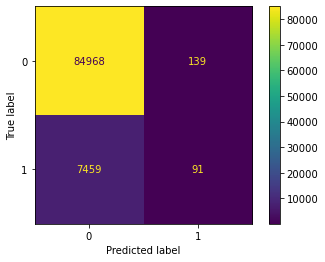

In [327]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred_2)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [330]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85107
           1       0.40      0.01      0.02      7550

    accuracy                           0.92     92657
   macro avg       0.66      0.51      0.49     92657
weighted avg       0.88      0.92      0.88     92657



# Original Variables w/ interactions BUT w/o SMOTE

In [333]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix

#Features
X = df[['Age_Category','Exercise','Arthritis' ,'Smoking_History', 'Diabetes']]

X = sm.add_constant(X)

# Add interaction terms
X['Exercise_BMI'] = df['BMI'] * df['Exercise']
X['Exercise_Fruit_Consump'] = df['Exercise'] * df['Fruit_Consumption']
X['Exercise_ Alcohol_Consump'] = df['Exercise'] * df['Alcohol_Consumption']
X['Diabetes_BMI'] = df['Diabetes'] *df['BMI']
X['Diabetes_Sex'] = df['Diabetes'] * df['Sex']
X['Diabetes_Smoking_Hist'] = df['Diabetes'] * df['Smoking_History']

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object
log_model_2 = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model_2.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred_2 = log_model_2.predict(x_test)

#printing the score(error) of the fitted log_model
print("Logistic Model Score on Training Data:",log_model_2.score(x_train,y_train))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model_2.score(x_test,y_test))

lmstr_2 = log_model_2.score(x_train,y_train)
lmste_2 = log_model_2.score(x_test,y_test)

Logistic Model Score on Training Data: 0.9189535469964893
Logistic Model Score on Testing Data: 0.9181929050152714


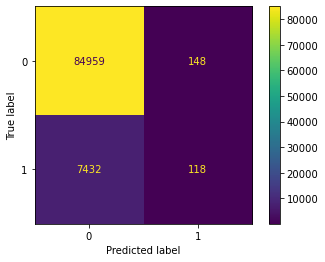

In [334]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred_2)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [335]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85107
           1       0.44      0.02      0.03      7550

    accuracy                           0.92     92657
   macro avg       0.68      0.51      0.49     92657
weighted avg       0.88      0.92      0.88     92657



# Original Variables w/ interactions AND w/ SMOTE

In [338]:
### My model
#Features
X = df[['Age_Category','Exercise','Arthritis' ,'Smoking_History', 'Diabetes']]


X = sm.add_constant(X)

# Add interaction terms
X['Exercise_BMI'] = df['BMI'] * df['Exercise']
X['Exercise_Fruit_Consump'] = df['Exercise'] * df['Fruit_Consumption']
X['Exercise_ Alcohol_Consump'] = df['Exercise'] * df['Alcohol_Consumption']
X['Diabetes_BMI'] = df['Diabetes'] *df['BMI']
X['Diabetes_Sex'] = df['Diabetes'] * df['Sex']
X['Diabetes_Smoking_Hist'] = df['Diabetes'] * df['Smoking_History']

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

# Apply SMOTE to balance the training data (synthetic minority oversampling technique)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Create and fit the Logistic Regression model on the resampled data
log_model_2 = LogisticRegression(max_iter=20000)
log_model_2.fit(x_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred_2 = log_model_2.predict(x_test)

# Printing the model's accuracy on training and testing data
print("Logistic Model Score on Training Data (Resampled):", log_model_2.score(x_train_resampled, y_train_resampled))
print("Logistic Model Score on Testing Data:", log_model_2.score(x_test, y_test))


Logistic Model Score on Training Data (Resampled): 0.7072634523282488
Logistic Model Score on Testing Data: 0.6735163020602869


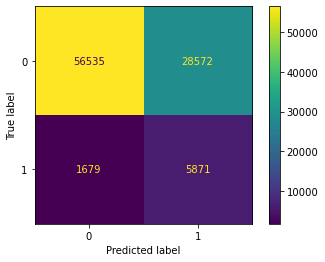

In [339]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred_2)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [340]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.66      0.79     85107
           1       0.17      0.78      0.28      7550

    accuracy                           0.67     92657
   macro avg       0.57      0.72      0.53     92657
weighted avg       0.91      0.67      0.75     92657



# Everything Below Here You Can IGNORE!!!
**JUST EXTRA ANALYSIS I CARRIED OUT!**

In [8]:
#Features
X = df.drop(['Heart_Disease'],axis=1)

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 split yields worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object; Setting max_iter=20000 to let algorithm converge
log_model = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred = log_model.predict(x_test)

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model.score(x_test,y_test))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model.score(x_test,y_test))

#Returning the accuracy of the model on the training and the testing data
lmstr = log_model.score(x_train,y_train)
lmste = log_model.score(x_test,y_test)

Logistic Model Score on Testing Data: 0.9186677746959215
Logistic Model Score on Testing Data: 0.9186677746959215


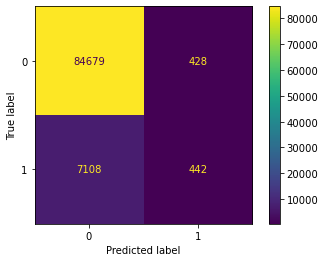

In [9]:
#Creating a confusion matrix; 
#True Neg == Top left, True Pos == Bottom Right
#False Neg == Bottom Left, False Pos == Top Right
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [10]:
lm_coefs = pd.DataFrame({"Coefs":log_model.coef_[:][0],"Column Names":x_train.columns})
print('Intercept:',log_model.intercept_)
lm_coefs

Intercept: [-0.02617261]


,Coefs,Column Names
0,-0.586750,General_Health
1,-0.206146,Checkup
2,-0.028447,Exercise
3,0.106338,Skin_Cancer
4,0.057997,Other_Cancer
5,0.238527,Depression
6,0.439197,Diabetes
7,0.259370,Arthritis
8,0.892743,Sex
9,0.275974,Age_Category


In [11]:
#Features
X = df[['Arthritis','Smoking_History','Age_Category','Diabetes','Depression']]

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object
log_model_2 = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model_2.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred_2 = log_model_2.predict(x_test)

#printing the score(error) of the fitted log_model
print("Logistic Model Score on Training Data:",log_model_2.score(x_train,y_train))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model_2.score(x_test,y_test))

lmstr_2 = log_model_2.score(x_train,y_train)
lmste_2 = log_model_2.score(x_test,y_test)

Logistic Model Score on Training Data: 0.9192079446060769
Logistic Model Score on Testing Data: 0.9182360749862396


In [12]:
lm_coefs_2 = pd.DataFrame({"Coefs":log_model_2.coef_[:][0],"Column Names":x_train.columns})
print('Intercept:',log_model.intercept_)
lm_coefs_2

Intercept: [-0.02617261]


,Coefs,Column Names
0,0.419048,Arthritis
1,0.580445,Smoking_History
2,0.291433,Age_Category
3,0.764459,Diabetes
4,0.380822,Depression


In [13]:
#Model 2 performs ever so slightly worse than our original model
print(lmstr_2 - lmstr)
print(lmste_2 - lmste)

#Subtracting the training and testing scores from model 2 by model 1, yield a negative number. 
#This denotes that model 1 had higher accuracies for both training and testing data

-0.00040703617533999203
-0.00043169970968193194


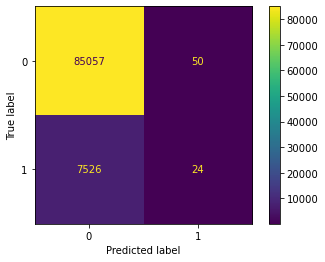

In [14]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred_2)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [16]:
confusion_matrix

array([[85057,    50],
       [ 7526,    24]])

In [24]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,1,0,1,0,0,0,1,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,1,1,0,0,0,0,1,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,1,1,1,0,0,0,1,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,1,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [25]:
### My model
#Features
X = df[['Age_Category','Exercise','BMI','Smoking_History','Weight_(kg)', 'Alcohol_Consumption', 'Diabetes', 'Arthritis']]

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object
log_model_2 = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model_2.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred_2 = log_model_2.predict(x_test)

#printing the score(error) of the fitted log_model
print("Logistic Model Score on Training Data:",log_model_2.score(x_train,y_train))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model_2.score(x_test,y_test))

lmstr_1 = log_model_2.score(x_train,y_train)
lmste_1 = log_model_2.score(x_test,y_test)

Logistic Model Score on Training Data: 0.9190460552181575
Logistic Model Score on Testing Data: 0.9181281500588191


In [26]:
print(lmstr_2 - lmstr_1)
print(lmste_2 - lmste_1)

0.00016188938791938945
0.00010792492742051074


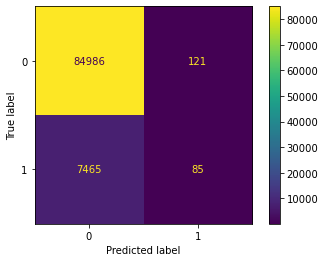

In [27]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred_2)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [111]:
### My model
#Features
X = df[['Age_Category','Exercise','Arthritis' ,'Smoking_History', 'Diabetes']]

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object
log_model_2 = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model_2.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred_2 = log_model_2.predict(x_test)

#printing the score(error) of the fitted log_model
print("Logistic Model Score on Training Data:",log_model_2.score(x_train,y_train))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model_2.score(x_test,y_test))

lmstr_2 = log_model_2.score(x_train,y_train)
lmste_2 = log_model_2.score(x_test,y_test)

Logistic Model Score on Training Data: 0.9187454034977358
Logistic Model Score on Testing Data: 0.9179986401459145


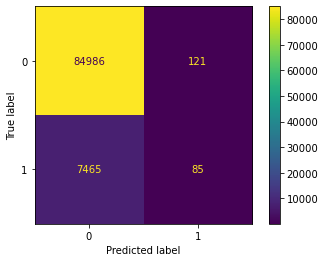

In [42]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred_2)
sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()

In [218]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85107
           1       0.44      0.02      0.03      7550

    accuracy                           0.92     92657
   macro avg       0.68      0.51      0.50     92657
weighted avg       0.88      0.92      0.88     92657



In [55]:
import statsmodels.formula.api as smf

# Correct the formula syntax by ensuring the predictors are separated by '+'
logit_reg = smf.logit('Heart_Disease ~ Age_Category + Exercise + Arthritis + Smoking_History + Diabetes', data=df).fit()

# Display the summary of the regression results
logit_reg.summary()


Optimization terminated successfully.
         Current function value: 0.239015
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Heart_Disease   No. Observations:               308854
Model:                          Logit   Df Residuals:                   308848
Method:                           MLE   Df Model:                            5
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1489
Time:                        12:51:47   Log-Likelihood:                -73821.
converged:                       True   LL-Null:                       -86739.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.0547      0.030   -167.194      0.000      -5.114      -4.995
Age_Category        0.2737      0.003     96.859      0.000       0.268       0.279
Exercise           -0.3396      0.015    -22.809      0.000      -0.369      -0.310
Arthritis           0.4515      0.014     31.538      0.000       0.423       0.480
Smoking_History     0.5869      0.014     41.825      0.000       0.559       0.614
Diabetes            0.7586      0.014     54.420      0.000       0.731       0.786
===================================================================================
"""

In [56]:
df_cal = df[['Heart_Disease', 'Age_Category','Exercise','Arthritis' ,'Smoking_History', 'Diabetes']].copy()
df_cal['predictions'] = logit_reg.predict(df_cal)

In [57]:
model_probs = np.linspace(0.05, 0.95, num=10)
true_probs = []

for prob in model_probs:
    true_probs.append(df_cal[(df_cal.predictions >= prob-0.05)
                                 & (df_cal.predictions <= prob+0.05)].Heart_Disease.mean())

In [ ]:
model_probs = np.linspace(0.05, 0.95, num=10)
true_probs = []

for prob in model_probs:
    true_probs.append(df_nomis_cal[(df_nomis_cal.predictions >= prob-0.05)
                                 & (df_nomis_cal.predictions <= prob+0.05)].Outcome.mean())

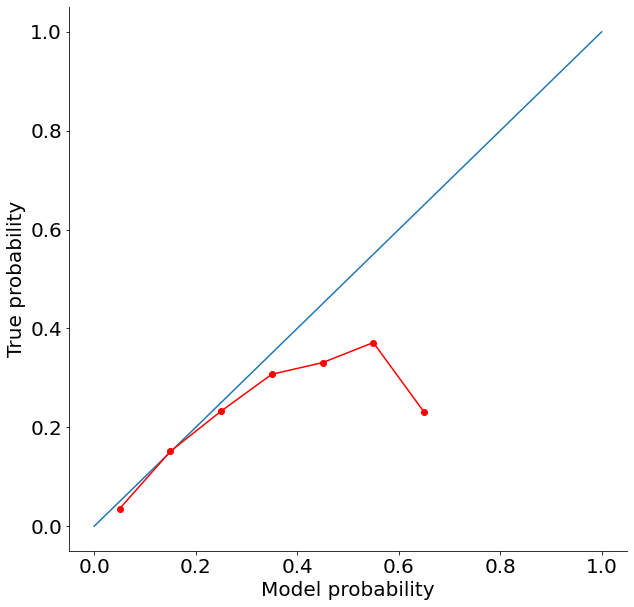

In [60]:
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1])
plt.plot(model_probs, true_probs, color='red', marker='o')

plt.xlabel('Model probability', fontsize=20)
plt.ylabel('True probability', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()

In [ ]:
### MODEL 1 


In [222]:
!pip install imbalanced-learn


     |████████████████████████████████| 258 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 11.7 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [224]:
from imblearn.over_sampling import SMOTE

In [226]:
# Define independent variables (including 'test_coupon' and its interactions)
X_browsing = df[['BMI',  'Exercise', 'Smoking_History', 'Alcohol_Consumption', 'Age_Category', 'Sex', 'Diabetes', 'Arthritis']]

# Add constant term to the independent variables
X_browsing = sm.add_constant(X_browsing)

# # Add interaction terms
# X_browsing['Exercise_BMI'] = X_browsing['BMI'] * X_browsing['Exercise']
# X_browsing['Exercise_Fruit_Consump'] = X_browsing['Exercise'] * X_browsing['Fruit_Consumption']
# X_browsing['Exercise_ Alcohol_Consump'] = X_browsing['Exercise'] * X_browsing['Alcohol_Consumption']
# X_browsing['Diabetes_BMI'] = X_browsing['Diabetes'] * X_browsing['BMI']
# X_browsing['Diabetes_Sex'] = X_browsing['Diabetes'] * X_browsing['Sex']
# X_browsing['Diabetes_Smoking_Hist'] = X_browsing['Diabetes'] * X_browsing['Smoking_History']


# Define the dependent variable (revenue after coupon)
y_browsing = df['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_browsing, y_browsing, test_size=0.2, random_state=42)

# Apply Smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
model_browsing = sm.Logit(y_train_resampled, X_train_resampled).fit()

# Print the model summary
print(model_browsing.summary())

Optimization terminated successfully.
         Current function value: 0.554143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:               454218
Model:                          Logit   Df Residuals:                   454209
Method:                           MLE   Df Model:                            8
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.2005
Time:                        17:35:48   Log-Likelihood:            -2.5170e+05
converged:                       True   LL-Null:                   -3.1484e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.1810      0.023   -139.796      0.000      -3.226      -3.136
BM

In [228]:
df_cal = df[['Heart_Disease', 'BMI',  'Exercise', 'Smoking_History', 'Alcohol_Consumption', 'Age_Category', 'Sex', 'Diabetes', 'Arthritis']].copy()

df_cal['predictions'] = model_browsing.predict(df_cal)

In [230]:
model_probs = np.linspace(0.05, 0.95, num=30)
true_probs = []

for prob in model_probs:
    true_probs.append(df_cal[(df_cal.predictions >= prob-0.05)
                                 & (df_cal.predictions <= prob+0.05)].Heart_Disease.mean())

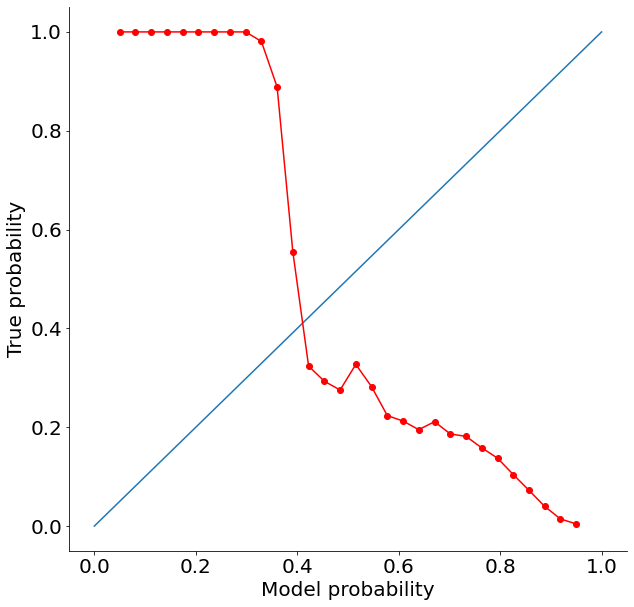

In [232]:
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1])
plt.plot(model_probs, true_probs, color='red', marker='o')

plt.xlabel('Model probability', fontsize=20)
plt.ylabel('True probability', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()

In [234]:
from sklearn.metrics import roc_auc_score

train_preds = model_browsing.predict(X_train)
test_preds = model_browsing.predict(X_test)

print("Train AUC:", roc_auc_score(y_train, train_preds))
print("Test AUC:", roc_auc_score(y_test, test_preds))

Train AUC: 0.8013827887353515
Test AUC: 0.8019390261697794


In [ ]:
MODEL 2

In [140]:
# Define independent variables (including 'test_coupon' and its interactions)
X_browsing = df[['BMI',  'Exercise', 'Smoking_History', 'Alcohol_Consumption', 'Age_Category', 'Sex', 'Diabetes', 'Arthritis']]

# Add constant term to the independent variables
X_browsing = sm.add_constant(X_browsing)

# Add interaction terms
X_browsing['Exercise_BMI'] = X_browsing['BMI'] * X_browsing['Exercise']
X_browsing['Exercise_Fruit_Consump'] = X_browsing['Exercise'] * df['Fruit_Consumption']
X_browsing['Exercise_ Alcohol_Consump'] = X_browsing['Exercise'] * X_browsing['Alcohol_Consumption']
X_browsing['Diabetes_BMI'] = X_browsing['Diabetes'] * X_browsing['BMI']
X_browsing['Diabetes_Sex'] = X_browsing['Diabetes'] * X_browsing['Sex']
X_browsing['Diabetes_Smoking_Hist'] = X_browsing['Diabetes'] * X_browsing['Smoking_History']



# Define the dependent variable (revenue after coupon)
y_browsing = df['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_browsing, y_browsing, test_size=0.2, random_state=42)

# Fit the regression model
model_browsing = sm.Logit(y_train, X_train).fit()

# Print the model summary
print(model_browsing.summary())


Optimization terminated successfully.
         Current function value: 0.233853
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:               247083
Model:                          Logit   Df Residuals:                   247068
Method:                           MLE   Df Model:                           14
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1672
Time:                        14:11:18   Log-Likelihood:                -57781.
converged:                       True   LL-Null:                       -69384.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.6557      0.078    -72.932      0.000      -5.

In [141]:
df_cal = df[['Heart_Disease', 'BMI',  'Exercise', 'Smoking_History', 'Alcohol_Consumption', 'Age_Category', 'Sex', 'Diabetes', 'Arthritis']].copy()
df_cal['Exercise_BMI'] = df_cal['BMI'] * df_cal['Exercise']
df_cal['Exercise_Fruit_Consump'] = df_cal['Exercise'] * df['Fruit_Consumption']
df_cal['Exercise_ Alcohol_Consump'] = df_cal['Exercise'] * df_cal['Alcohol_Consumption']
df_cal['Diabetes_BMI'] = df_cal['Diabetes'] * df_cal['BMI']
df_cal['Diabetes_Sex'] = df_cal['Diabetes'] * df_cal['Sex']
df_cal['Diabetes_Smoking_Hist'] = df_cal['Diabetes'] * df_cal['Smoking_History']
df_cal['predictions'] = model_browsing.predict(df_cal)

In [144]:
df_cal

,Heart_Disease,BMI,Exercise,Smoking_History,Alcohol_Consumption,Age_Category,Sex,Diabetes,Arthritis,Exercise_BMI,Exercise_Fruit_Consump,Exercise_ Alcohol_Consump,Diabetes_BMI,Diabetes_Sex,Diabetes_Smoking_Hist,predictions
0,0,14.54,0,1,0.0,10,0,0,1,0.00,0.0,0.0,0.00,0,0,0.982408
1,1,28.29,0,0,0.0,10,0,1,0,0.00,0.0,0.0,28.29,0,0,0.131365
2,0,33.47,1,0,4.0,8,0,1,0,33.47,12.0,4.0,33.47,0,0,0.945663
3,1,28.73,1,0,0.0,11,1,1,0,28.73,30.0,0.0,28.73,1,0,0.239954
4,0,24.37,0,1,0.0,12,1,0,0,0.00,0.0,0.0,0.00,0,0,0.992628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,0,29.05,1,0,4.0,1,1,0,0,29.05,30.0,4.0,0.00,0,0,0.695096
308850,0,21.48,1,0,8.0,9,1,1,0,21.48,15.0,8.0,21.48,1,0,0.975863
308851,0,24.69,1,1,4.0,2,0,2,0,24.69,40.0,4.0,49.38,0,2,0.887693
308852,0,23.73,1,0,3.0,9,1,0,0,23.73,30.0,3.0,0.00,0,0,0.952630


In [146]:
model_probs = np.linspace(0.05, 0.95, num=30)
true_probs = []

for prob in model_probs:
    true_probs.append(df_cal[(df_cal.predictions >= prob-0.05)
                                 & (df_cal.predictions <= prob+0.05)].Heart_Disease.mean())

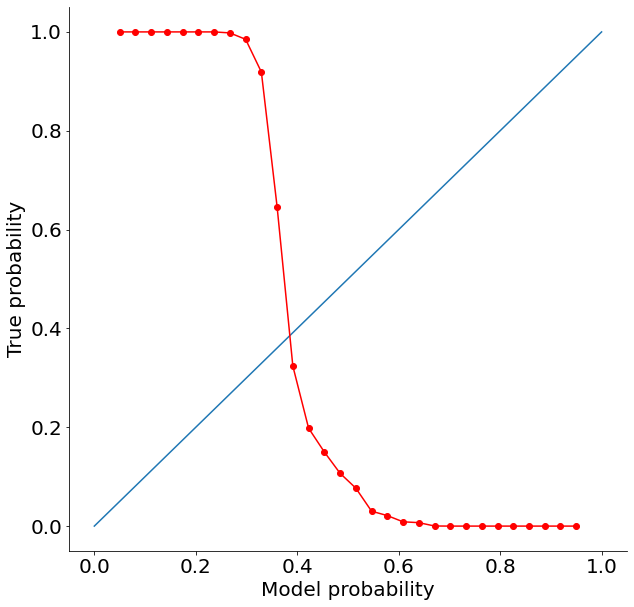

In [147]:
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1])
plt.plot(model_probs, true_probs, color='red', marker='o')

plt.xlabel('Model probability', fontsize=20)
plt.ylabel('True probability', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()

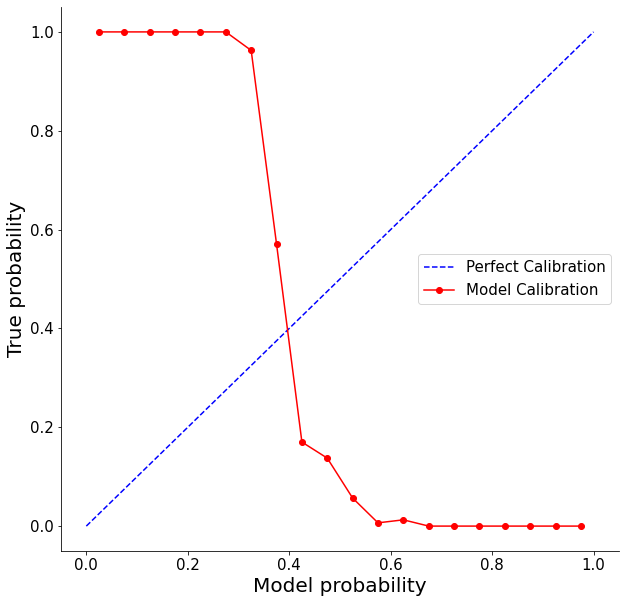

In [150]:
# Add fixed bins to calculate true probabilities
df_cal['pred_bin'] = pd.cut(df_cal['predictions'], bins=np.linspace(0, 1, 21))

# Calculate mean true probabilities for each bin
true_probs = df_cal.groupby('pred_bin')['Heart_Disease'].mean()

# Bin centers for x-axis
bin_centers = [interval.mid for interval in true_probs.index]

# Plot calibration curve
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Perfect Calibration')
plt.plot(bin_centers, true_probs, color='red', marker='o', label='Model Calibration')

plt.xlabel('Model probability', fontsize=20)
plt.ylabel('True probability', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
sns.despine()
plt.show()


In [124]:
from sklearn.metrics import roc_auc_score

train_preds = model_browsing.predict(X_train)
test_preds = model_browsing.predict(X_test)

print("Train AUC:", roc_auc_score(y_train, train_preds))
print("Test AUC:", roc_auc_score(y_test, test_preds))


Train AUC: 0.8052078306177426
Test AUC: 0.8058576330143032


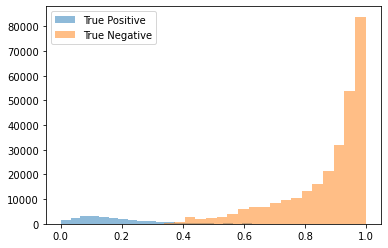

In [126]:
plt.hist(df_cal['predictions'][df_cal['Heart_Disease'] == 1], bins=20, alpha=0.5, label='True Positive')
plt.hist(df_cal['predictions'][df_cal['Heart_Disease'] == 0], bins=20, alpha=0.5, label='True Negative')
plt.legend()
plt.show()


In [262]:
### Model 2 w/0 interactions

In [209]:
### My model
#Features
X = df[['BMI',  'Exercise', 'Smoking_History', 'Alcohol_Consumption', 'Age_Category', 'Sex', 'Diabetes', 'Arthritis']]


X = sm.add_constant(X)

#Labels
y = df['Heart_Disease']

#Splitting the data into training and testing; 70% Training, 30% Testing
#80-20 yielded worse results
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=12)

#Creating a Logistic Regression Object
log_model_2 = LogisticRegression(max_iter=20000)

#Fitting the training data to a logistic model
log_model_2.fit(x_train,y_train)

#Training the log model on the x_test data
y_pred_2 = log_model_2.predict(x_test)

#printing the score(error) of the fitted log_model
print("Logistic Model Score on Training Data:",log_model_2.score(x_train,y_train))

#Printing the score of the fitted log_model on testing data
print("Logistic Model Score on Testing Data:",log_model_2.score(x_test,y_test))

lmstr_2 = log_model_2.score(x_train,y_train)
lmste_2 = log_model_2.score(x_test,y_test)

Logistic Model Score on Training Data: 0.9189304199410723
Logistic Model Score on Testing Data: 0.9180849800878509
